DIM= (609, 524)


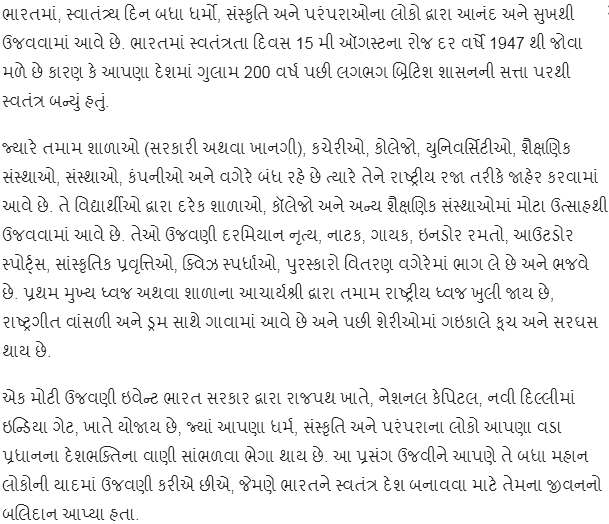

In [202]:
import json,requests,numpy as np,base64
from io import BytesIO
from PIL import Image
nbu='https://raw.githubusercontent.com/smartm13/smartm13.github.io/master/PIL_image_2lines_2chars.ipynb'
#nbu='https://image.ibb.co/ciLB8d/gujarati.jpg'
r=requests.get(nbu)
if r.url.endswith('.ipynb'):
    rj=r.json()
    bs=rj['cells'][1]["outputs"][1]["data"]["image/png"].strip()
    bsb=BytesIO(base64.decodebytes(bs.encode()))
else:
    bsb=BytesIO(r.content)
f=Image.open(bsb).convert('L')
print("DIM=",f.size)
display(f)

In [203]:
#whitest_pixel=255. blackest_pixel=0
#we r interested in , value=255-pixel, blackness of pixel
#lesser the line with blackpixels, more chances it is empty line

#get each pixel line's sum
#f=f1
line=[255*f.size[0]-sum([f.getpixel((r,c)) for r in range(f.size[0])]) for c in range(f.size[1])]

#split lines to set of lines by empty lines
emptyline_threshold=150 #sumof (pixel values of line) less than this is said empty line
implines=[[]]
for l in range(len(line)):
    if line[l]<=emptyline_threshold:
        if implines[-1]:implines.append([]) #append new list for next line set
    else:implines[-1].append(l)
if not implines[-1]:implines=implines[:-1]#skip last set if empty
len(implines)
imgs=[]
for aset in implines:
    aimg=[]
    for aline in aset:
        aimg.append([f.getpixel((r,aline)) for r in range(f.size[0])])#append aline'th line to this set
    imgs.append(aimg)

ims=[Image.fromarray(np.array(imgsi).astype('uint8'), 'L') for imgsi in imgs]
#merging image(with height less than 25%) to its next image
maximght=max([im.size[1] for im in ims])
avght=float(sum([im.size[1] for im in ims]))/len([im.size[1] for im in ims])
faulters_index=list(filter(lambda xi:ims[xi].size[1]<maximght*.25 and ims[xi].size[1]<avght*.50,range(len(ims))))
#print("faulted lines:",faulters_index)
new_ims,buf=[],[]
for i in range(len(ims)):
    if i not in faulters_index:
        #merge buf and i
        #add to new_ims
        buf.append(np.asarray(ims[i]))
        merged=np.concatenate(buf).astype('uint8')
        new_ims.append(Image.fromarray(merged,'L'))
        buf=[]
    else:
        #add to buf
        buf.append(np.asarray(ims[i]))
        #if exist,add white lines previously ignored
        if i+1<len(implines) and implines[i+1]:
            img_w=[[f.getpixel((r,aline)) for r in range(f.size[0])] for aline in range(implines[i][-1]+1,implines[i+1][0])]
            buf.append(np.array(img_w))
ims=new_ims
for i in range(len(ims)):
    print("Image no.",i,"shape",ims[i].size)
    display(ims[i])
    #save each image to /lines_ directory
    #ims[i].save("lines_/{}.jpg".format(i))

Image no. 0 shape (609, 20)


Image no. 1 shape (609, 16)


Image no. 2 shape (609, 20)


Image no. 3 shape (609, 18)


Image no. 4 shape (609, 20)


Image no. 5 shape (609, 19)


Image no. 6 shape (609, 19)


Image no. 7 shape (609, 20)


Image no. 8 shape (609, 20)


Image no. 9 shape (609, 20)


Image no. 10 shape (609, 19)


Image no. 11 shape (609, 16)


Image no. 12 shape (609, 19)


Image no. 13 shape (609, 19)


Image no. 14 shape (609, 19)


Image no. 15 shape (609, 19)


Image no. 16 shape (609, 17)


In [204]:
lineno=1
import PIL.ImageOps    
sample_line=PIL.ImageOps.invert(ims[lineno])
sample_ar=np.asarray(sample_line)
display(sample_line)
print(sample_ar.shape)
row_thresh=80
blackcols_i=list(iv[0] for iv in filter(lambda xiv:xiv[1]<row_thresh,enumerate(sample_ar.max(axis=0).tolist())))

boxes=[]
for c in range(1,sample_line.size[0]):
    if c not in blackcols_i:#c-whitebox
        if c-1 not in blackcols_i:#c-1whitebox
            pass#zaaundee
        else:#c-1blackbox
            boxes.append([c,-1])#make new whitebox-init with c
    else:#c-blackbox
        if c-1 not in blackcols_i:#c-1whitebox
            boxes[-1][1]=c#end old whitebox-with c
        else:#c-1black
            pass#zaaundee
if boxes[-1][-1]==-1:boxes[-1][-1]=c
#boxes
rp=[(Image.fromarray(np.uint8(sample_ar[:,bxS:bxE])),[bxS,bxE]) for bxS,bxE in boxes if bxS!=bxE]
def showrpi(rpi):
    display(rpi[0])
    print(rpi[1])
#[showrpi(rpi) for rpi in rp] and 0

(16, 609)


In [205]:
whsps=sample_ar[:,boxes[0][0]:boxes[0][1]]
whsp=np.zeros_like(whsps)+255
whspi=Image.fromarray(np.uint8(whsp))

In [206]:
#inaccurate algo=bounding boxes
per=.15
bboxes=[[bxs-(bxe-bxs)*per,bxe+(bxe-bxs)*per] for bxs,bxe in boxes]
nboxs=[[boxes[0][0],-1]]
for bi in range(1,len(bboxes)):
    if bboxes[bi][0]>bboxes[bi-1][1]:
        if nboxs:nboxs[-1][-1]=boxes[bi-1][1]
        nboxs.append([boxes[bi][0],-1])
if nboxs[-1][-1]==-1:nboxs[-1:]=[]
nboxs
imgssw=[[Image.fromarray(np.uint8(sample_ar[:,bxS:bxE])),whspi] for bxS,bxE in nboxs[:] if bxS!=bxE]
imgssw=sum(imgssw,[])
display(sample_line)
display(Image.fromarray(np.concatenate([np.array(npi) for npi in imgssw],axis=1)))
print(" ".join([str(x) for x in nboxs]))

[3, 69] [75, 92] [94, 104] [110, 120] [123, 124] [131, 147] [149, 155] [158, 184] [190, 248] [254, 291] [297, 302] [305, 313] [319, 334] [340, 365] [367, 402] [409, 433] [439, 446] [449, 454] [462, 485] [491, 495] [499, 524] [530, 545]


In [207]:
#keyboard spacing algo, hacked
thresh_black_continuous=3
blackboxs,c=[[blackcols_i[0],-1]],0
for i in range(1,len(blackcols_i)):
    c+=1
    if blackcols_i[i]-1!=blackcols_i[i-1]:
        blackboxs[-1][-1]=c
        c=0
        blackboxs.append([blackcols_i[i],-1])
blackboxs[-1][-1]=c+1
fbboxs=list(filter(lambda x:x[1]>thresh_black_continuous,blackboxs[1:]))
fbboxs=[blackboxs[0]]+fbboxs
print('blackboxs',','.join(map(str,blackboxs)))
print('fbboxs',','.join(map(str,fbboxs)))

nboxs1=[]
for i in range(1,len(fbboxs)):
    nboxs1.append([sum(fbboxs[i-1]),fbboxs[i][0]])
nboxs1
imgssw1=[[Image.fromarray(np.uint8(sample_ar[:,bxS:bxE])),whspi] for bxS,bxE in nboxs1[:] if bxS!=bxE]
imgssw1=sum(imgssw1,[])
display(sample_line)
display(Image.fromarray(np.concatenate([np.array(npi) for npi in imgssw1],axis=1)))
print(" ".join([str(x) for x in nboxs1]))

blackboxs [0, 3],[12, 1],[25, 1],[36, 2],[48, 1],[52, 2],[69, 6],[88, 1],[92, 2],[104, 6],[120, 3],[124, 7],[143, 1],[147, 2],[155, 3],[168, 2],[180, 1],[184, 6],[208, 2],[220, 1],[232, 2],[244, 1],[248, 6],[266, 2],[279, 1],[291, 6],[302, 3],[313, 6],[334, 6],[357, 1],[365, 2],[370, 1],[385, 2],[398, 1],[402, 7],[420, 1],[433, 6],[446, 3],[454, 8],[472, 1],[485, 6],[495, 4],[506, 1],[515, 2],[524, 6],[545, 5],[566, 2],[578, 1],[582, 27]
fbboxs [0, 3],[69, 6],[104, 6],[124, 7],[184, 6],[248, 6],[291, 6],[313, 6],[334, 6],[402, 7],[433, 6],[454, 8],[485, 6],[495, 4],[524, 6],[545, 5],[582, 27]


[3, 69] [75, 104] [110, 124] [131, 184] [190, 248] [254, 291] [297, 313] [319, 334] [340, 402] [409, 433] [439, 454] [462, 485] [491, 495] [499, 524] [530, 545] [550, 582]
